# PAD - Praca domowa 4
## Jan Solarz s26342

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
PATH = "C:/Users/Jan Solarz/Downloads/Studia/london_merged.csv"

# a) Budowa modelu dla całego okresu

In [131]:
df = pd.read_csv(PATH, sep=",")

In [132]:
df

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [133]:
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm



X = df.iloc[:,2:10]
Y = df['cnt']
 
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)


# with statsmodels
#X=sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)


                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.623
Model:                            OLS   Adj. R-squared (uncentered):              0.623
Method:                 Least Squares   F-statistic:                              3595.
Date:                Sat, 04 Dec 2021   Prob (F-statistic):                        0.00
Time:                        19:24:23   Log-Likelihood:                     -1.4443e+05
No. Observations:               17414   AIC:                                  2.889e+05
Df Residuals:                   17406   BIC:                                  2.889e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

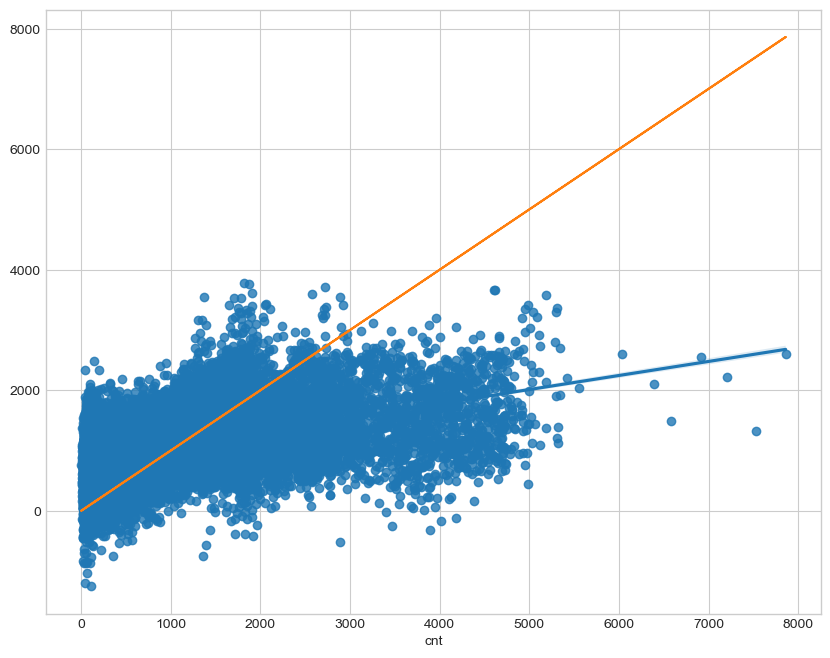

In [134]:
import seaborn as sns;
sns.regplot(x=df['cnt'], y=predictions)
plt.plot(df['cnt'],df['cnt'])

# b) Tworzymy kolumny 'hour' oraz 'year'

In [135]:
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

In [136]:
from datetime import datetime

In [137]:
df['year'] = df['timestamp'].dt.year
df['hour'] = df['timestamp'].dt.hour

In [138]:
df

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,hour
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,2
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,3
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,4
...,...,...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0,2017,19
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0,2017,20
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0,2017,21
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0,2017,22


# c) Istotność zmiennych

P-value zmiennych niezależnych w modelu regresji są bardzo bliskie 0. Oznacza to, że są istotne (posiadają poziom istotności poniżej 0).

# d) Heatmap korelacji zmiennych

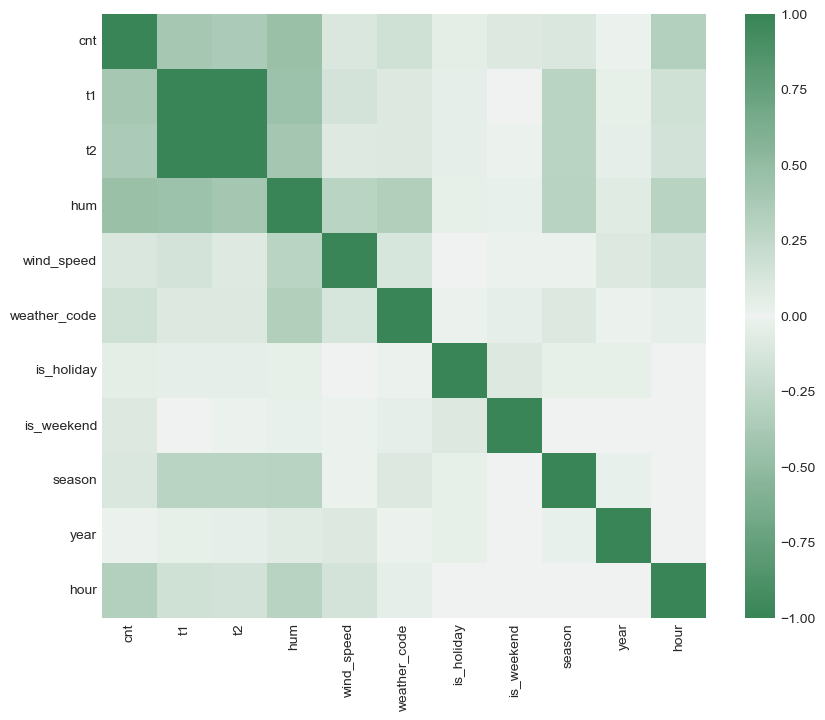

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_full_health = df.corr()

axis_corr = sns.heatmap(
correlation_full_health,
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(500, 500, n=500),
square=True
)

plt.show()

Powyższa mapa pokazuje liniową zależność między zmiennymi t1 i t2. Korelacje na średnim poziomie występują pomiędzy zmiennymi hum i cnt oraz t1, ewentualnie między season i hum, t1, t2. W więszkości obserwuje się brak korelacji między zmiennymi. Ze zmienną cnt najbardziej skorelowana sie wydaje zmienna hum.

In [140]:


import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model






# e) Analiza w podziale ze wzgl na rok.

In [141]:
np.unique(df['year'])

array([2015, 2016, 2017], dtype=int64)

In [142]:
df1 = df[df['year']==2015]
df2 = df[df['year']==2016]
df3 = df[df['year']==2017]

# Rok 2015

In [143]:
X = df1.iloc[:,2:12]
Y = df1['cnt']
 
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)


# with statsmodels
#X=sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     421.1
Date:                Sat, 04 Dec 2021   Prob (F-statistic):               0.00
Time:                        19:24:26   Log-Likelihood:                -70930.
No. Observations:                8643   AIC:                         1.419e+05
Df Residuals:                    8633   BIC:                         1.420e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
t1              83.7479     13.144      6.372   

In [144]:
from sklearn.linear_model import LinearRegression

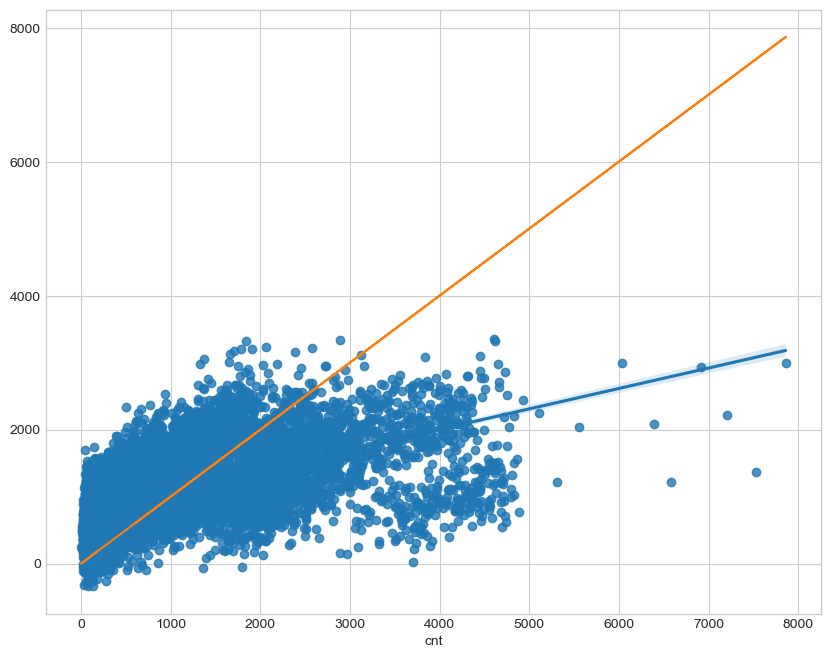

In [145]:

sns.regplot(x=df1['cnt'], y=predictions)
plt.plot(df1['cnt'],df1['cnt'])

# 2016

In [146]:
X = df2.iloc[:,2:12]
Y = df2['cnt']
 
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)


# with statsmodels
#X=sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     422.3
Date:                Sat, 04 Dec 2021   Prob (F-statistic):               0.00
Time:                        19:24:26   Log-Likelihood:                -71740.
No. Observations:                8699   AIC:                         1.435e+05
Df Residuals:                    8689   BIC:                         1.436e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
t1              43.2099     13.160      3.283   

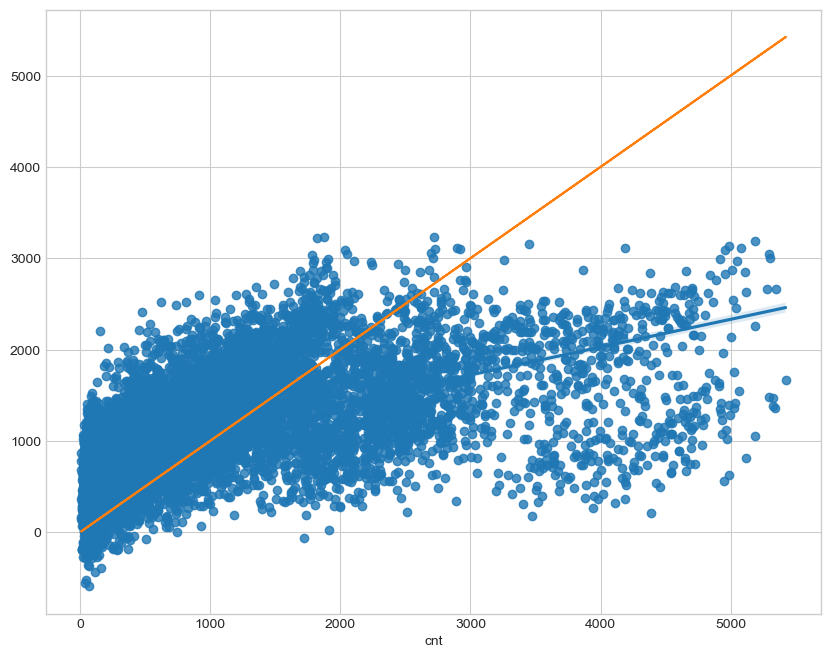

In [147]:
sns.regplot(x=df2['cnt'], y=predictions)
plt.plot(df2['cnt'],df2['cnt'])

# 2017

In [148]:
X = df3.iloc[:,2:12]
Y = df3['cnt']
 
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)


# with statsmodels
#X=sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     4.332
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           0.000335
Time:                        19:24:27   Log-Likelihood:                -547.50
No. Observations:                  72   AIC:                             1113.
Df Residuals:                      63   BIC:                             1133.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
t1             333.0499    258.002      1.291   

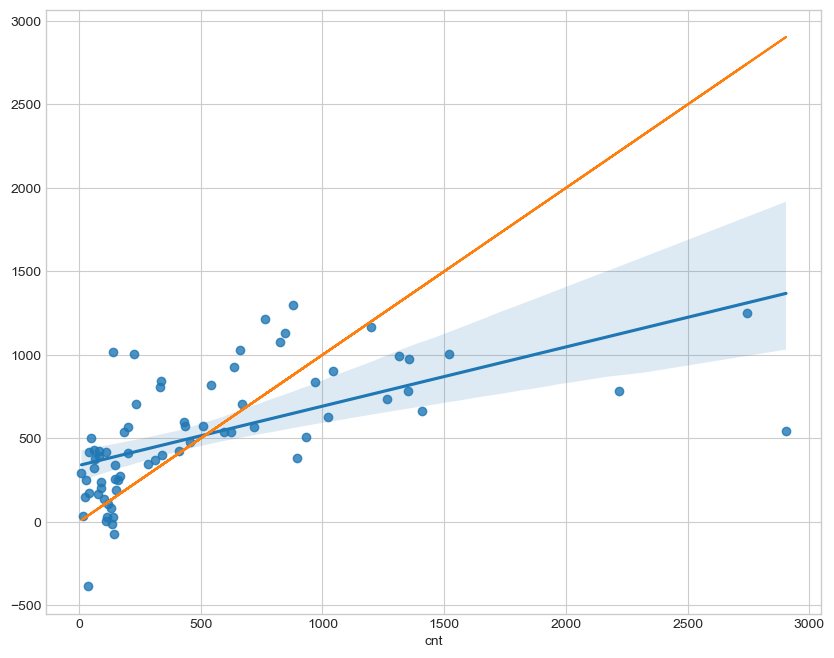

In [149]:
sns.regplot(x=df3['cnt'], y=predictions)
plt.plot(df3['cnt'],df3['cnt'])

## Wnioski:
- dla roku 2015 zmienna weather_code przestała być istotna, wspołczynnik R2 modelu spadł do poziomu 0.305.
- dla roku 2016 zmienne t2 i wind_speed posiadają wysokei p-value, nie są istotne dla modelu. R2 równe 0.304.
- dla roku 2017 R2 wynosi 0.355, natomiast skorygowany 0.273, co świadczy spadku liczby obserwacji. Wiele zmiennych traci swoją moc.
